### HASH TABLES

- Essentially this is what happens:
- A hashing function aka a maths function, takes in the key from a key-value pair and passes that function into the maths function
- A hashing function basically takes in an integer of any size and transforms it to an integer of a fixed size
- It also has a 'information loss function' in the function, such that the direction at which information can travel is one way, ie from key to index. You cannot determine the key from the index.
    - example of this how this loss function is implemented --> whatever the integer calculated is --> it will be rounded up or down. --> that number is the index at which the key/value is stored at
- The number/index computed from that function will be mapped to the index at which the data of the key-value pair will be stored in the array
- For example, let say key = 2 and value = "Banana"
- Hash Function w/ loss function at the end which rounds up or down the number --> f(key) = (key*2+103)*1.023
- Therefore, the index of the array (created on the backend) at which (2,"Banana") is stored at is --> f(2) = (2*2+103)*1.023 = 109.461 ie if rounded up or down it will by 109 --> ie index 109
- From this you can see that even if you know the index,109, you cannot work backwards to find the value of the key
- Each position/index on an array is also called bucket
- Now, good hash tables have good formulas essentially that ensure that every f(key) calculated is unique, such that 1 bucket has only one value
- However, this is not always possible. Sometimes 2 key-value pairs are stored in 1 bucket --> this is called collision
    - For example after passing 2 different key values into the hashing function before rounding up or down, the values can be 102.13 and 101.90 --> therefore after rounding it up or down values for both is 102 --> ie index 102
    - Therefore the 2 respective key/value pairs will be stored at index 102 --> causing a collision
    - This can happen more than once
- The strength of the hashing function is based on how well its formula minimises collisions between the different key. 
    - Having no collisions is impossible. As every array these data is stored at has a finite space therefore a finite indexc  --> however there can be infinite number of keys --> for example 1 --> ∞


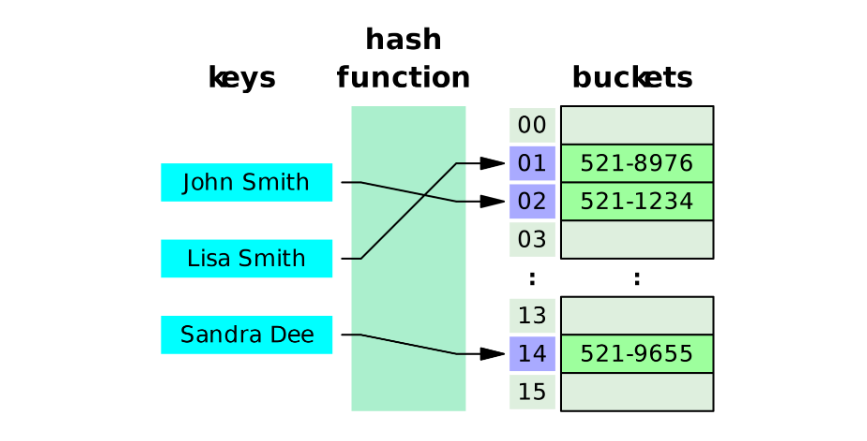

In [9]:
phone_num = {

    "a" : 2,
    "b" : 3,
    "c" : 4

}

In [10]:
print(phone_num["b"])

3


In [12]:
### lets create a simple hashing function
### This hashing function will take in a string, split it character by character, give each character an integer
### value and sum it up
### No loss function created in this step

def get_index_very_basic(a_string):

    result = 0
    for a_character in a_string:
        result = result + ord(a_character)

    return result

print(get_index_very_basic("Shreyas")) # --> 735. Ie data will be stored at index 735

735


In [15]:
### we need index to be within the storage size of whatever the list we define to be. Ie if we define a list
### of size 200, if we run the above example, we will get error as index 735 wont exist
def get_index(data_list,a_string):

    result = 0
    for a_character in a_string:
        result = result + ord(a_character)

    result = result % len(data_list) # if value of second number is bigger than first, modulus value == to first value
                                     # 5%10 == 5

    print("Successfully Inserted")
    return result

hash_list = [None]*1000 ### --> ie we create a hash list with size 1000, therefore 0-999 index, and give all a value of None
### print(len(hash_list))
print(get_index(hash_list,"Shreyas")) 

1000
735


In [66]:
### I want to create a simple Hash table class --> ie a python dictionary --> for now it the key value pair will be 
### name and number --> so that the hashing function is simple

### Hash Table has to have 6 methods: find,update,list,insert,init
class Simple_hash_table:
        
        # init method to create hash_list
        def __init__(self,max_size):
                self.hash_list = [None]*max_size
                self.max_size = max_size # to make this var accessible at other parts of the class

        # insert method to insert key/val pair into hash_list 
        def insert(self,key,value):
                index=get_index(self.hash_list,key)
                self.hash_list[index]=[key,value]

        def find(self,key):
                index=get_index(self.hash_list,key)
                if self.hash_list[index] != None:                                                     
                        print(self.hash_list[index][1])
                else:
                        print("Nothing here")

        def update(self,key,value):
                index=get_index(self.hash_list,key)
                self.hash_list[index] = [key,value]

        def list(self):
                count = 0
                while(count<self.max_size):
                        if self.hash_list[count] != None:
                                print(self.hash_list[count])
                        #print(count)
                        count = count + 1    

                print("Done Listing")


In [74]:
phone_book_a = Simple_hash_table(1000)
phone_book_a.insert("John","123")
phone_book_a.insert("Caleb","8781")
phone_book_a.insert("Zues","549")

In [75]:
phone_book_a.find("Caleb")
phone_book_a.update("Caleb","9999")
phone_book_a.find("Caleb")

8781
9999


In [76]:
phone_book_a.list()

['John', '123']
['Zues', '549']
['Caleb', '9999']
Done Listing


In [77]:
#phone_book_a.insert("listen","1111112")

data_list = [None]*1000
print(get_index(data_list,"listen"))
print(get_index(data_list,"silent"))  

# As you can observe, both has index IDs of 655. So there will be a collision when trying to insert both values into phone_book_a/

#phone_book_a.insert("listen","1111112")

655
655


In [79]:
phone_book_a.insert("listen","6598")
phone_book_a.insert("silent","1111112")


phone_book_a.list()
phone_book_a.find("listen")

# AS you can due to the collision, key == listen does not have the correct value displayed. Instead the value fo key=silent is being displayed. To combat this --> next chapter


['John', '123']
['Zues', '549']
['Caleb', '9999']
['silent', '1111112']
Done Listing
1111112


In [121]:
### Handling Collisions with linear probing (one of the methods)
### Simple concept --> when a keys index gets converted to the index, program checks if buckets at the specified index is empty. If empty, key value pair is stored there. If not empty, then it will check the (index + 1) and see if 
### that is empty. If it is not --> it will go to (index + 2) and repeat the process UNTIL it finds an empty bucket

class Simple_hash_table_with_linear_probing:
        
        # init method to create hash_list
        def __init__(self,max_size):
                self.hash_list = [None]*max_size
                self.max_size = max_size # to make this var accessible at other parts of the class

        # function checks if there is anything at the desired index. If there is, it will plus (index + 1) and check --> doing so on and so forth for everything
        def get_valid_index(self,index):
                
                bool_value = True

                while bool_value == True:
                        if self.hash_list[index] == None:
                                return index
                        else:
                                #index = index + 1   --> cannot use this logic as if there is alot of data stored, then to avoid collisions, indexes might be kept being pushed down until they reach max_size
                                # therefore to ensure that data is still stored somewhere after index == 999, index value is resetted to 0 to be stored there. If index = 0 is occupied, then the next index value will be checked
                                # ie, index 1 --> so on and so forth

                                if index >= 0 and index < self.max_size:
                                        index = index + 1

                                else:
                                        index = 0

                                bool_value = True     
       
       # As keys might not be stored at their exact index, as the bucket at that index might previously be occupied and inorder to prevent collisions we shift the key/value pair down to the subsequent indexes until we find an empty one
       # Therefore in order to ensure that we get the correct values from the correct keys, we need to check both indexes and their first value and see if the first value is equal to the key
        def check_keys(self,index,key):

                while True:
                        if self.hash_list[index][0] != key:
                                
                                if index >= 0 and index < self.max_size:
                                        index = index + 1

                                else:
                                        index = 0
                        else:
                                return index

        
              
        # insert method to insert key/val pair into hash_list 
        def insert(self,key,value):
                
                index=get_index(self.hash_list,key)

                # use this function to return the valid index for key value pair to ensure no collisions
                valid_index = self.get_valid_index(index)

                self.hash_list[valid_index]=[key,value]

        def find(self,key):
                index=get_index(self.hash_list,key)
                valid_index = self.check_keys(index,key)
                
                if self.hash_list[index] != None:                                                     
                        print(self.hash_list[index][1])
                else:
                        print("Nothing here")

        def update(self,key,value):
                index=get_index(self.hash_list,key)
                valid_index = self.check_keys(index,key) # to check if I am at the correct index to correct thing
                self.hash_list[index] = [key,value]

        
        def list(self):
                count = 0
                while(count<self.max_size):
                        if self.hash_list[count] != None:
                                print(self.hash_list[count])
                        #print(count)
                        count = count + 1    

                print("Done Listing")

        



In [122]:
phone_book_b = Simple_hash_table_with_linear_probing(1000)
phone_book_b.insert("listen","6598")
phone_book_b.insert("silent","1111112")

phone_book_b.find("listen")

phone_book_b.list()

phone_book_b.update("listen","THANKS JESUS")

phone_book_b.list()

6598
['listen', '6598']
['silent', '1111112']
Done Listing
['listen', 'THANKS JESUS']
['silent', '1111112']
Done Listing
